# Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


# Шаблон ноутбука

In [17]:
import tensorflow as tf

import pandas as pd

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

from sklearn import preprocessing 

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

print("Devices Available: ", tf.config.list_physical_devices())

Devices Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [18]:
display(load_wine())

x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


In [19]:
x_data = pd.DataFrame(x_data, columns=load_wine()['feature_names'])
y_data = pd.DataFrame(y_data)

display(x_data.head())
display(y_data.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,0
0,0
1,0
2,0
3,0
4,0


## Подготовка данных

In [20]:
# Перевод в one hot encoding
from numpy import disp


y_data = tf.keras.utils.to_categorical(y_data, 3)

x_data_scaled = preprocessing.MinMaxScaler().fit_transform(x_data)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data_scaled,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [21]:
# ваше решение
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=13, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

display(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                896       
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 3)                 51        
                                                                 
Total params: 3,555
Trainable params: 3,555
Non-traina

None

Epoch 1/20
15/15 [==============================] - 5s 77ms/step - loss: 1.0855 - accuracy: 0.3403 - val_loss: 1.0529 - val_accuracy: 0.2500
Epoch 2/20
15/15 [==============================] - 0s 30ms/step - loss: 1.0279 - accuracy: 0.4722 - val_loss: 0.9910 - val_accuracy: 0.5625
Epoch 3/20
15/15 [==============================] - 0s 21ms/step - loss: 0.9737 - accuracy: 0.5903 - val_loss: 0.9313 - val_accuracy: 0.7500
Epoch 4/20
15/15 [==============================] - 0s 27ms/step - loss: 0.9065 - accuracy: 0.6875 - val_loss: 0.8465 - val_accuracy: 0.8750
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8226 - accuracy: 0.8125 - val_loss: 0.7268 - val_accuracy: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 33ms/step - loss: 0.7330 - accuracy: 0.8194 - val_loss: 0.6040 - val_accuracy: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6326 - accuracy: 0.8819 - val_loss: 0.4948 - val_accuracy: 1.0000
Epoch 8/20
15

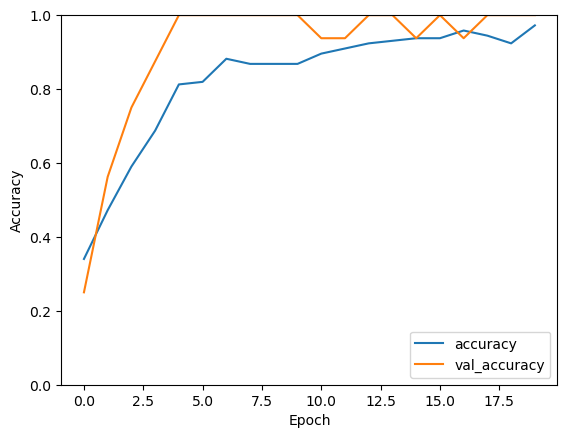

In [22]:

history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()


In [23]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 77ms/step - loss: 0.0612 - accuracy: 1.0000


[0.06117457151412964, 1.0]